In [6]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Normalization
from tensorflow.keras import optimizers
import numpy as np; import sys
import matplotlib.pyplot as plt

In [4]:
(AX, AY), (QX, QY) = fashion_mnist.load_data()
AX=255-AX; QX=255-QX

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28

model = Sequential()
model.add(Normalization(input_shape=(nl,nc))) #Normaliza
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

opt=optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.get_layer(index=0).adapt(AX) #Calcula media e desvio
model.fit(AX, AY2, batch_size=100, epochs=80, verbose=2);

score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/80
600/600 - 5s - loss: 0.4396 - accuracy: 0.8414 - 5s/epoch - 8ms/step
Epoch 2/80
600/600 - 3s - loss: 0.3184 - accuracy: 0.8836 - 3s/epoch - 5ms/step
Epoch 3/80
600/600 - 3s - loss: 0.2760 - accuracy: 0.8985 - 3s/epoch - 5ms/step
Epoch 4/80
600/600 - 3s - loss: 0.2453 - accuracy: 0.9095 - 3s/epoch - 5ms/step
Epoch 5/80
600/600 - 3s - loss: 0.2219 - accuracy: 0.9175 - 3s/epoch - 5ms/step
Epoch 6/80
600/600 - 3s - loss: 0.2022 - accuracy: 0.9248 - 3s/epoch - 5ms/step
Epoch 7/80
600/600 - 3s - loss: 0.1855 - accuracy: 0.9302 - 3s/epoch - 5ms/step
Epoch 8/80
600/600 - 3s - loss: 0.1726 - accuracy: 0.9360 - 3s/epoch - 5ms/step
Epoch 9/80
600/600 - 3s - loss: 0.1577 - accuracy: 0.9421 - 3s/epoch - 5ms/step
Epoch 10/80
600/600 - 3s - loss: 0.1455 - accuracy: 0.9465 - 3s/epoch - 5ms/step
Epoch 11/80
600/600 - 3s - loss: 0.1336 - accuracy: 0.9503 - 3s/epoch - 5ms/step
Epoch 12/80
600/600 - 3s - loss: 0.1229 - accuracy: 0.9

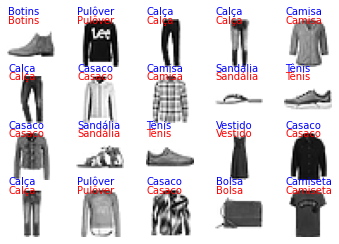

In [8]:
QP2 = model.predict(QX); QP = QP2.argmax(axis=-1)
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
f = plt.figure()
for i in range(20):
    f.add_subplot(4,5,i+1)
    plt.imshow( QX[i], cmap="gray")
    plt.axis("off");
    plt.text(0,-3,categorias[QY[i]],color="b")
    plt.text(0, 2,categorias[QP[i]],color="r")
plt.savefig("nome_imagem.png")
plt.show()
